<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Dudziak/26_03_24_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np

from numpy import mean
from numpy import std
from numpy import absolute

from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

In [2]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
housing

(20640, 8) (20640,)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)

print(df.head())

y = housing.target

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [10]:
# Regresja wielomianowa st. 2

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Wynik R^2 na zbiorze testowym: ", score)

Wynik R^2 na zbiorze testowym: 0.6456819713278688


In [12]:
# Stworzyć obiekt reapeted kvold i wywołać walidację krzyżową typu RepeatedKFold

# Stworzenie obiektu RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
lin = LinearRegression()
xpol2 = PolynomialFeatures(2)
x2 = xpol2.fit_transform(df)
cv_scores_pol2 = cross_val_score(lin, x2, y, cv=rkf,scoring='neg_mean_absolute_error')
print(cross_val_score(lin, x2, y, cv=rkf,scoring='neg_mean_absolute_error'))

[-0.46700093 -0.46992443 -0.45647681 -0.90348222 -0.47752681 -0.45932243
 -2.87050518 -0.46508602 -0.46613888 -0.47423247 -0.51867573 -0.4569673
 -0.53326182 -0.45737619 -0.47412388]


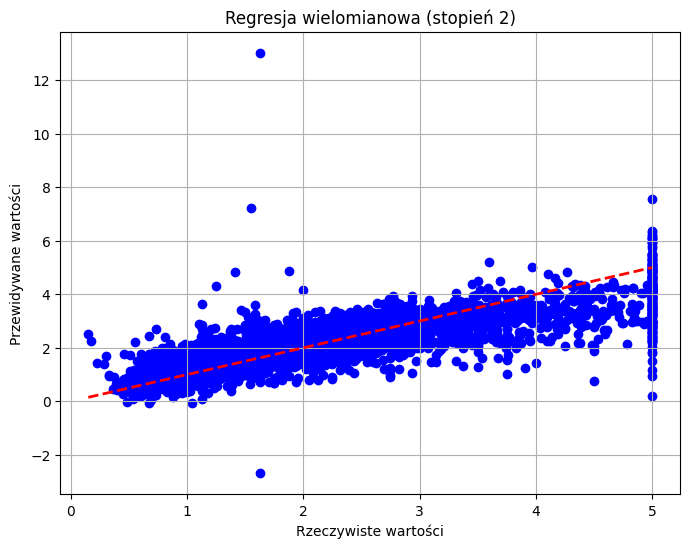

In [15]:
# Przewidywanie na danych testowych
y_pred = model.predict(X_test)

# Wykres
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Regresja wielomianowa (stopień 2)')
plt.grid(True)
plt.show()

In [16]:
# regresja wielomianowa st. 3
model2 = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

model2.fit(X_train, y_train)

score2 = model2.score(X_test, y_test)
print("Wynik R^2 na zbiorze testowym: ", score2)

Wynik R^2 na zbiorze testowym:  -17.395619727030436


In [18]:
# Stworzenie obiektu RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
lin = LinearRegression()
cv_scores_linear =  cross_val_score(lin, df, y, cv=rkf,scoring='neg_mean_absolute_error')

xpol3 = PolynomialFeatures(3)
x3 = xpol2.fit_transform(df)
cv_scores_pol3 = cross_val_score(lin, x3, y, cv=rkf,scoring='neg_mean_absolute_error')

print(cross_val_score(lin, x3, y, cv=rkf,scoring='neg_mean_absolute_error'))

[-0.46700093 -0.46992443 -0.45647681 -0.90348222 -0.47752681 -0.45932243
 -2.87050518 -0.46508602 -0.46613888 -0.47423247 -0.51867573 -0.4569673
 -0.53326182 -0.45737619 -0.47412388]


In [22]:
knn_cv = KNeighborsRegressor(n_neighbors=3)
cv_scores_knn = cross_val_score(knn_cv, df, y, cv=rkf)

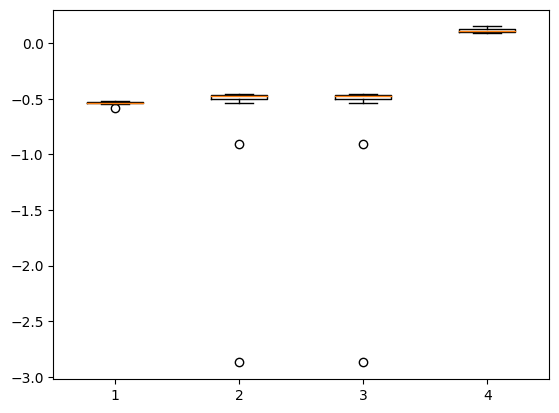

In [23]:
plt.boxplot([cv_scores_linear, cv_scores_pol2, cv_scores_pol3, cv_scores_knn])
plt.show()

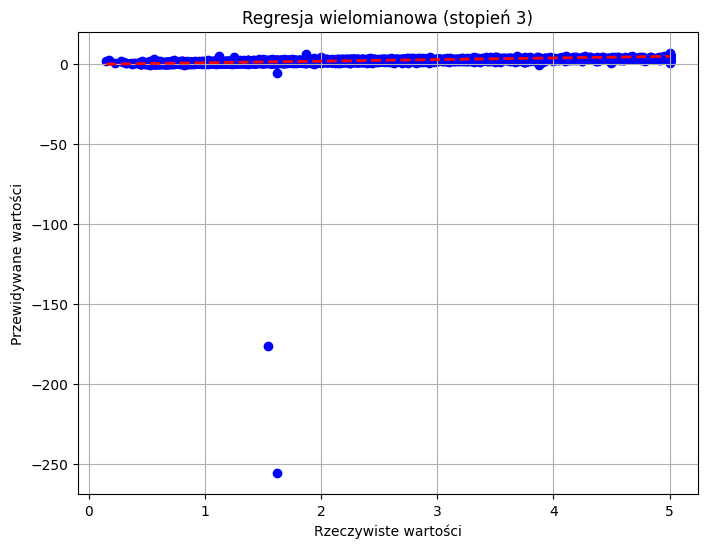

In [24]:
# Przewidywanie na danych testowych
y_pred2 = model2.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Regresja wielomianowa (stopień 3)')
plt.grid(True)
plt.show()